In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

In [2]:
with open("game_data.json", "r") as file:
    json_data = json.load(file)

In [3]:
games_df = pd.DataFrame(json_data)
games_df

,options,players,table_stats
0,"{'Game mode': 'Normal mode', 'Game speed': 'Tu...","[{'score': '12', 'score_aux': '1', 'gamerank':...","{'player_number': '4', 'avg_points': '8.75', '..."
1,"{'Game mode': 'Normal mode', 'Game speed': 'Tu...","[{'score': '11', 'score_aux': '1', 'gamerank':...","{'player_number': '4', 'avg_points': '6.5', 'b..."
2,"{'Game mode': 'Normal mode', 'Game speed': 'Tu...","[{'score': '11', 'score_aux': '1', 'gamerank':...","{'player_number': '4', 'avg_points': '7.5', 'b..."
3,"{'Game mode': 'Normal mode', 'Game speed': 'Re...","[{'score': '17', 'score_aux': '1', 'gamerank':...","{'player_number': '3', 'avg_points': '13', 'be..."
4,"{'Game mode': 'Normal mode', 'Game speed': 'Tu...","[{'score': '12', 'score_aux': '1', 'gamerank':...","{'player_number': '4', 'avg_points': '8.25', '..."
...,...,...,...
20434,"{'Game mode': 'Training mode', 'Game speed': '...","[{'score': '10', 'score_aux': '1', 'gamerank':...","{'player_number': '4', 'avg_points': '7.5', 'b..."
20435,"{'Game mode': 'Training mode', 'Game speed': '...","[{'score': '9', 'score_aux': '1', 'gamerank': ...","{'player_number': '4', 'avg_points': '6.5', 'b..."
20436,"{'Game mode': 'Training mode', 'Game speed': '...","[{'score': '10', 'score_aux': '1', 'gamerank':...","{'player_number': '3', 'avg_points': '9.33333'..."
20437,"{'Game mode': 'Training mode', 'Game speed': '...","[{'score': '10', 'score_aux': '1', 'gamerank':...","{'player_number': '4', 'avg_points': '5.75', '..."


In [4]:
def print_winning_percentages(game_results, subtitle):
    winning_positions = game_results['table_stats'].apply(lambda x: int(x['winning_position']))
    winning_positions = winning_positions[winning_positions != 0]
    win_counts = winning_positions.value_counts()

    # Create the bar chart
    bars = plt.bar(win_counts.keys(), win_counts.values)
    plt.xlabel("Player Position")
    plt.ylabel("Number of Wins")
    plt.title(f"Wins by Player Position in {subtitle}")
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    plt.show()

There are 8876 4-player games in the dataset out of 20439 total games


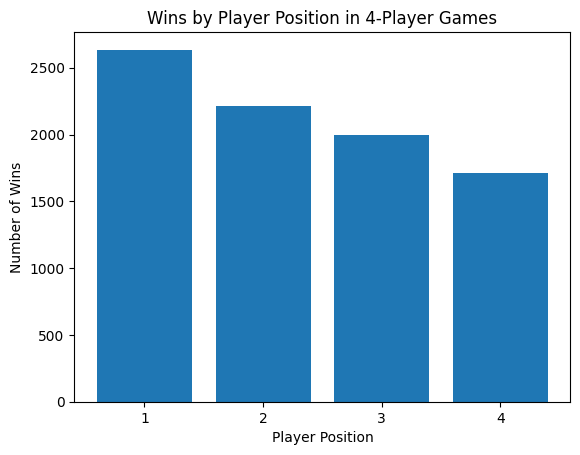

In [5]:
four_player_games = games_df[games_df['table_stats'].apply(lambda x: x['player_number']) == "4"]
print(f"There are {len(four_player_games)} 4-player games in the dataset out of {len(games_df)} total games")
print_winning_percentages(four_player_games, "4-Player Games")

There are 4406 3-player games in the dataset out of 20439 total games


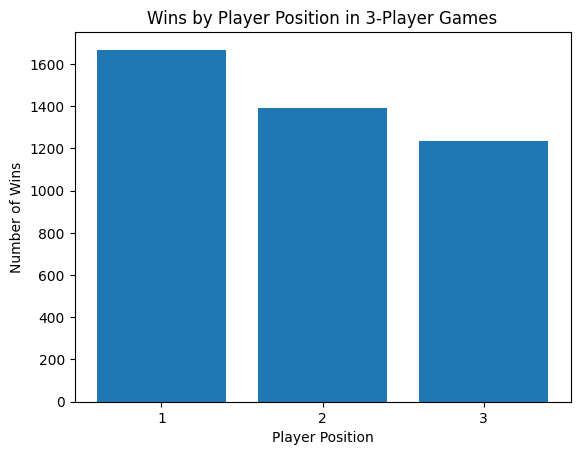

In [6]:
three_player_games = games_df[games_df['table_stats'].apply(lambda x: x['player_number']) == "3"]
print(f"There are {len(three_player_games)} 3-player games in the dataset out of {len(games_df)} total games")
print_winning_percentages(three_player_games, "3-Player Games")

In [7]:
def all_players_above(players, elo):
    for player in players:
        if float(player['rank_after_game']) < elo:
            return False
    return True

There are 253 high ELO 4-player games in the dataset out of 20439 total games


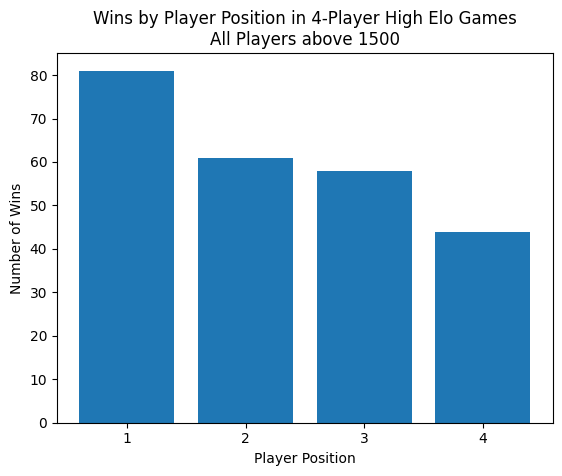

In [8]:
high_elo_four = four_player_games[four_player_games['players'].apply(lambda x: all_players_above(x, 1500))]
print(f"There are {len(high_elo_four)} high ELO 4-player games in the dataset out of {len(games_df)} total games")
print_winning_percentages(high_elo_four, "4-Player High Elo Games\nAll Players above 1500")

There are 3220 high ELO 4-player games in the dataset out of 20439 total games


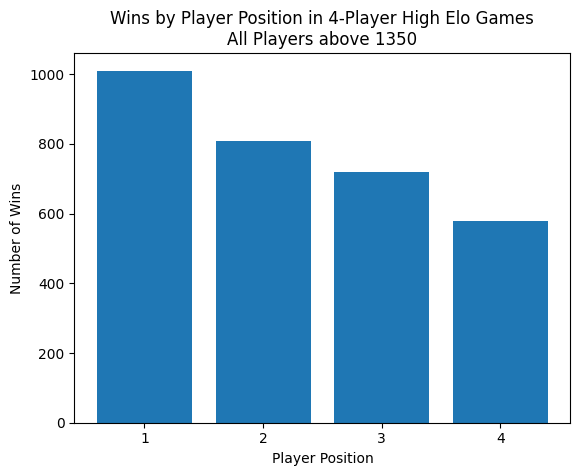

In [9]:
medium_elo_four = four_player_games[four_player_games['players'].apply(lambda x: all_players_above(x, 1350))]
print(f"There are {len(medium_elo_four)} high ELO 4-player games in the dataset out of {len(games_df)} total games")
print_winning_percentages(medium_elo_four, "4-Player High Elo Games\nAll Players above 1350")

<Axes: >

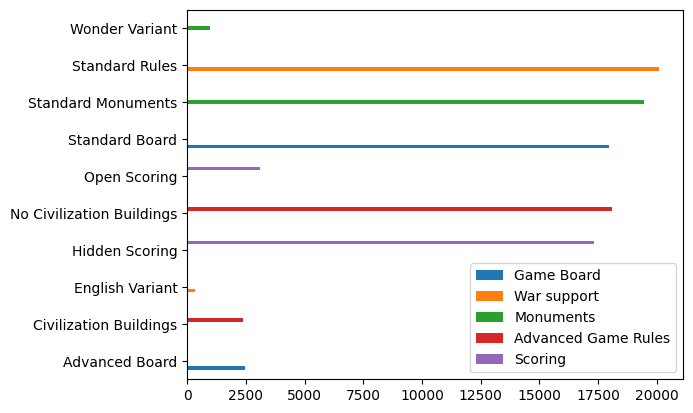

In [10]:
game_options = pd.json_normalize(games_df['options'])
game_options.drop(columns=["Game speed", "Time allotted to each player", "Playing hours", "Game mode"], inplace=True)
game_options.apply(pd.Series.value_counts).plot.barh(rot=0)

<Axes: title={'center': 'Game options in 4 player ELO >1500 tables'}>

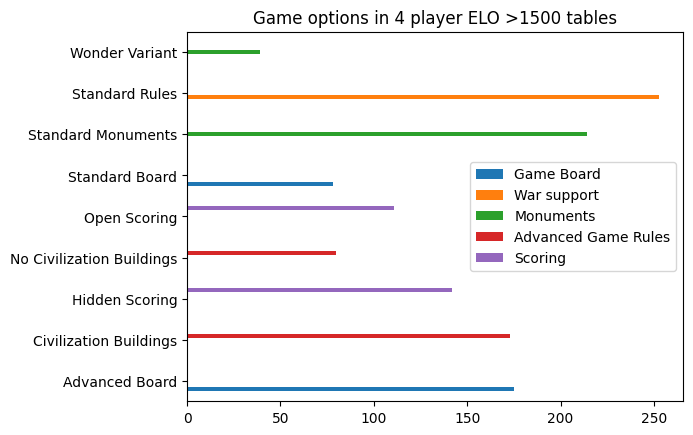

In [11]:
four_player_games = games_df[games_df['players'].apply(lambda x: len(x)) == 4]
high_elo_four = four_player_games[four_player_games['players'].apply(lambda x: all_players_above(x, 1500))]
game_options = pd.json_normalize(high_elo_four['options'])
game_options.drop(columns=["Game speed", "Time allotted to each player", "Playing hours", "Game mode"], inplace=True)
game_options.apply(pd.Series.value_counts).plot.barh(rot=0, title="Game options in 4 player ELO >1500 tables")

In [ ]:
ranks = pd.json_normalize(games_df['players'].explode('players'))['rank_after_game'].astype('float64')

In [ ]:
rank_counts = ranks.value_counts().sort_index()

In [ ]:
ranks.describe()

In [ ]:
bin_edges = np.arange(1250, 1800, 5)
# Group the ELO ranks into bins of 10 points
elo_rank_bins = pd.cut(ranks, bins=bin_edges)
bin_counts = elo_rank_bins.value_counts().sort_index()

In [ ]:
bin_midpoints = bin_edges[:-1] + 5
plt.plot(bin_midpoints, bin_counts.values)
plt.title("ELO distribution\nNote starting value 1300, and floor of 1400")
plt.show()

In [ ]:
high_ranks = ranks[ranks > 1400]
high_ranks

In [ ]:
rank_counts = high_ranks.value_counts().sort_index()
bin_edges = np.arange(1400, 1800, 5)
# Group the ELO ranks into bins of 10 points
elo_rank_bins = pd.cut(high_ranks, bins=bin_edges)
bin_counts = elo_rank_bins.value_counts().sort_index()
bin_midpoints = bin_edges[:-1] + 5
plt.plot(bin_midpoints, bin_counts.values)
plt.title("ELO Distribution after floor")